# Importing Libraries and Dependencies

In [1]:
pip install googletrans==4.0.0-rc1

  Preparing metadata (setup.py) ... - \ | done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 2.7 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17396 sha256=9caf04813f47db80a55c4f9d4206c2755fc94f40fd40b39817c420fbb64a9634
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
    Found existing installation: h11 0.14.0
    Uninstalling h11-0.14.0

In [2]:
import os
import requests, zipfile, io
import shutil

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import folium
import requests
from googletrans import Translator
from IPython.display import display

from statsmodels.tsa.stattools import adfuller, grangercausalitytests
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX

* Checking and deleting all the files in the workspace.

In [3]:
try:
    folder_path = "/kaggle/working/"
    shutil.rmtree(folder_path)
    print('Folder and its content removed')
except:
    print('Folder not deleted')

Folder not deleted


* Downloading the dataset from `https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip`.
* Extracting all the data-files from the zip and deleting the zip file.

In [4]:
zip_file_url = "https://archive.ics.uci.edu/static/public/501/beijing+multi+site+air+quality+data.zip"
r = requests.get(zip_file_url)

z = zipfile.ZipFile(io.BytesIO(r.content))
z.extract("PRSA2017_Data_20130301-20170228.zip","/kaggle/working/")

f = zipfile.ZipFile("/kaggle/working/PRSA2017_Data_20130301-20170228.zip")
f.extractall("/kaggle/working/")

try:
    os.remove("PRSA2017_Data_20130301-20170228.zip")
except:
    print("No zip file to remove")

* Printing all the Extracted file name

In [5]:
os.chdir("/kaggle/working/PRSA_Data_20130301-20170228")

print("Previous File Names:")
for data_file in os.listdir(os.getcwd()):
    print('\t' + data_file)
    file_name = list(data_file.split('_'))
    os.rename(data_file, str(file_name[2])+'.csv')

Previous File Names:
	PRSA_Data_Dongsi_20130301-20170228.csv
	PRSA_Data_Tiantan_20130301-20170228.csv
	PRSA_Data_Dingling_20130301-20170228.csv
	PRSA_Data_Aotizhongxin_20130301-20170228.csv
	PRSA_Data_Guanyuan_20130301-20170228.csv
	PRSA_Data_Changping_20130301-20170228.csv
	PRSA_Data_Huairou_20130301-20170228.csv
	PRSA_Data_Nongzhanguan_20130301-20170228.csv
	PRSA_Data_Shunyi_20130301-20170228.csv
	PRSA_Data_Wanliu_20130301-20170228.csv
	PRSA_Data_Gucheng_20130301-20170228.csv
	PRSA_Data_Wanshouxigong_20130301-20170228.csv


* Printing the File names after renameing, and storing their path into a list

In [6]:
print("New File Names:")
file_url_list = []
city_names = []
for file_name in os.listdir(os.getcwd()):
    print("\t" + file_name)
    city_names.append(file_name[:-4])
    file_url_list.append(os.getcwd()+'/'+file_name)

New File Names:
	Guanyuan.csv
	Dingling.csv
	Nongzhanguan.csv
	Changping.csv
	Huairou.csv
	Tiantan.csv
	Wanshouxigong.csv
	Aotizhongxin.csv
	Gucheng.csv
	Wanliu.csv
	Shunyi.csv
	Dongsi.csv


In [7]:
import folium
import requests
from IPython.display import display

# List of cities
cities = city_names  # Add more cities as needed

# Initialize map
mymap = folium.Map(location=[37, 108], zoom_start=5)

# Get GeoJSON data for China's international border
china_border_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries/CHN.geo.json"
china_border_data = requests.get(china_border_url).json()

# Add China's international border to the map
folium.GeoJson(china_border_data).add_to(mymap)

# Geocode each city and add markers to the map
for city in cities:
    # Make a request to Nominatim API to get coordinates
    response = requests.get(f"https://nominatim.openstreetmap.org/search?format=json&q={city}")
    data = response.json()
    
    # Extract latitude and longitude from the response
    if data:
        latitude = float(data[0]['lat'])
        longitude = float(data[0]['lon'])
        
        # Add marker with annotated city name
        folium.Marker(location=[latitude, longitude], popup=folium.Popup(city, parse_html=True)).add_to(mymap)

# Display the map as a figure
display(mymap)


In [8]:
file_url_list

['/kaggle/working/PRSA_Data_20130301-20170228/Guanyuan.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Dingling.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Nongzhanguan.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Changping.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Huairou.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Tiantan.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Wanshouxigong.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Aotizhongxin.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Gucheng.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Wanliu.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Shunyi.csv',
 '/kaggle/working/PRSA_Data_20130301-20170228/Dongsi.csv']

# Data Pre-processing

In [9]:
df_0 = pd.read_csv(file_url_list[0])
df_0.drop(columns=['No'], inplace=True)
df_0

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,2013,3,1,0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Guanyuan
1,2013,3,1,1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,Guanyuan
2,2013,3,1,2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Guanyuan
3,2013,3,1,3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Guanyuan
4,2013,3,1,4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,Guanyuan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,2017,2,28,19,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,Guanyuan
35060,2017,2,28,20,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,Guanyuan
35061,2017,2,28,21,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,Guanyuan
35062,2017,2,28,22,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,Guanyuan


In [10]:
df_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     35064 non-null  int64  
 1   month    35064 non-null  int64  
 2   day      35064 non-null  int64  
 3   hour     35064 non-null  int64  
 4   PM2.5    34448 non-null  float64
 5   PM10     34635 non-null  float64
 6   SO2      34590 non-null  float64
 7   NO2      34405 non-null  float64
 8   CO       33311 non-null  float64
 9   O3       33891 non-null  float64
 10  TEMP     35044 non-null  float64
 11  PRES     35044 non-null  float64
 12  DEWP     35044 non-null  float64
 13  RAIN     35044 non-null  float64
 14  wd       34983 non-null  object 
 15  WSPM     35050 non-null  float64
 16  station  35064 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 4.5+ MB


In [11]:
df_0['timestamp'] = pd.to_datetime(df_0[["year", "month", "day", "hour"]])
df_0 = df_0.sort_values(by="timestamp").reset_index(drop=True)

In [12]:
df_0.drop(columns=['year', 'month', 'day', 'hour', 'station'], inplace=True)

In [13]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,timestamp
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,2017-02-28 19:00:00
35060,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,2017-02-28 20:00:00
35061,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,2017-02-28 21:00:00
35062,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,2017-02-28 22:00:00


In [14]:
df_0.dtypes

PM2.5               float64
PM10                float64
SO2                 float64
NO2                 float64
CO                  float64
O3                  float64
TEMP                float64
PRES                float64
DEWP                float64
RAIN                float64
wd                   object
WSPM                float64
timestamp    datetime64[ns]
dtype: object

In [15]:
df_0.describe()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM,timestamp
count,34448.000000,34635.000000,34590.000000,34405.000000,33311.000000,33891.000000,35044.000000,35044.000000,35044.000000,35044.000000,35050.000000,35064
mean,82.933372,109.023303,17.590941,57.901643,1271.294377,55.795044,13.584607,1011.846920,3.123062,0.067421,1.708496,2015-03-01 11:30:00
min,2.000000,2.000000,1.000000,2.000000,100.000000,0.214200,-16.800000,985.900000,-35.300000,0.000000,0.000000,2013-03-01 00:00:00
25%,23.000000,40.000000,3.000000,31.000000,500.000000,7.000000,3.100000,1003.300000,-8.100000,0.000000,0.900000,2014-03-01 05:45:00
50%,59.000000,89.000000,8.000000,51.000000,900.000000,41.000000,14.500000,1011.400000,3.800000,0.000000,1.400000,2015-03-01 11:30:00
75%,115.000000,149.000000,22.000000,78.000000,1600.000000,81.000000,23.300000,1020.100000,15.600000,0.000000,2.200000,2016-02-29 17:15:00
max,680.000000,999.000000,293.000000,270.000000,10000.000000,415.000000,40.500000,1042.000000,28.500000,72.500000,11.200000,2017-02-28 23:00:00
std,80.933497,91.573709,23.600367,35.150857,1164.854945,57.436983,11.399097,10.404047,13.688896,0.910056,1.204071,NaN


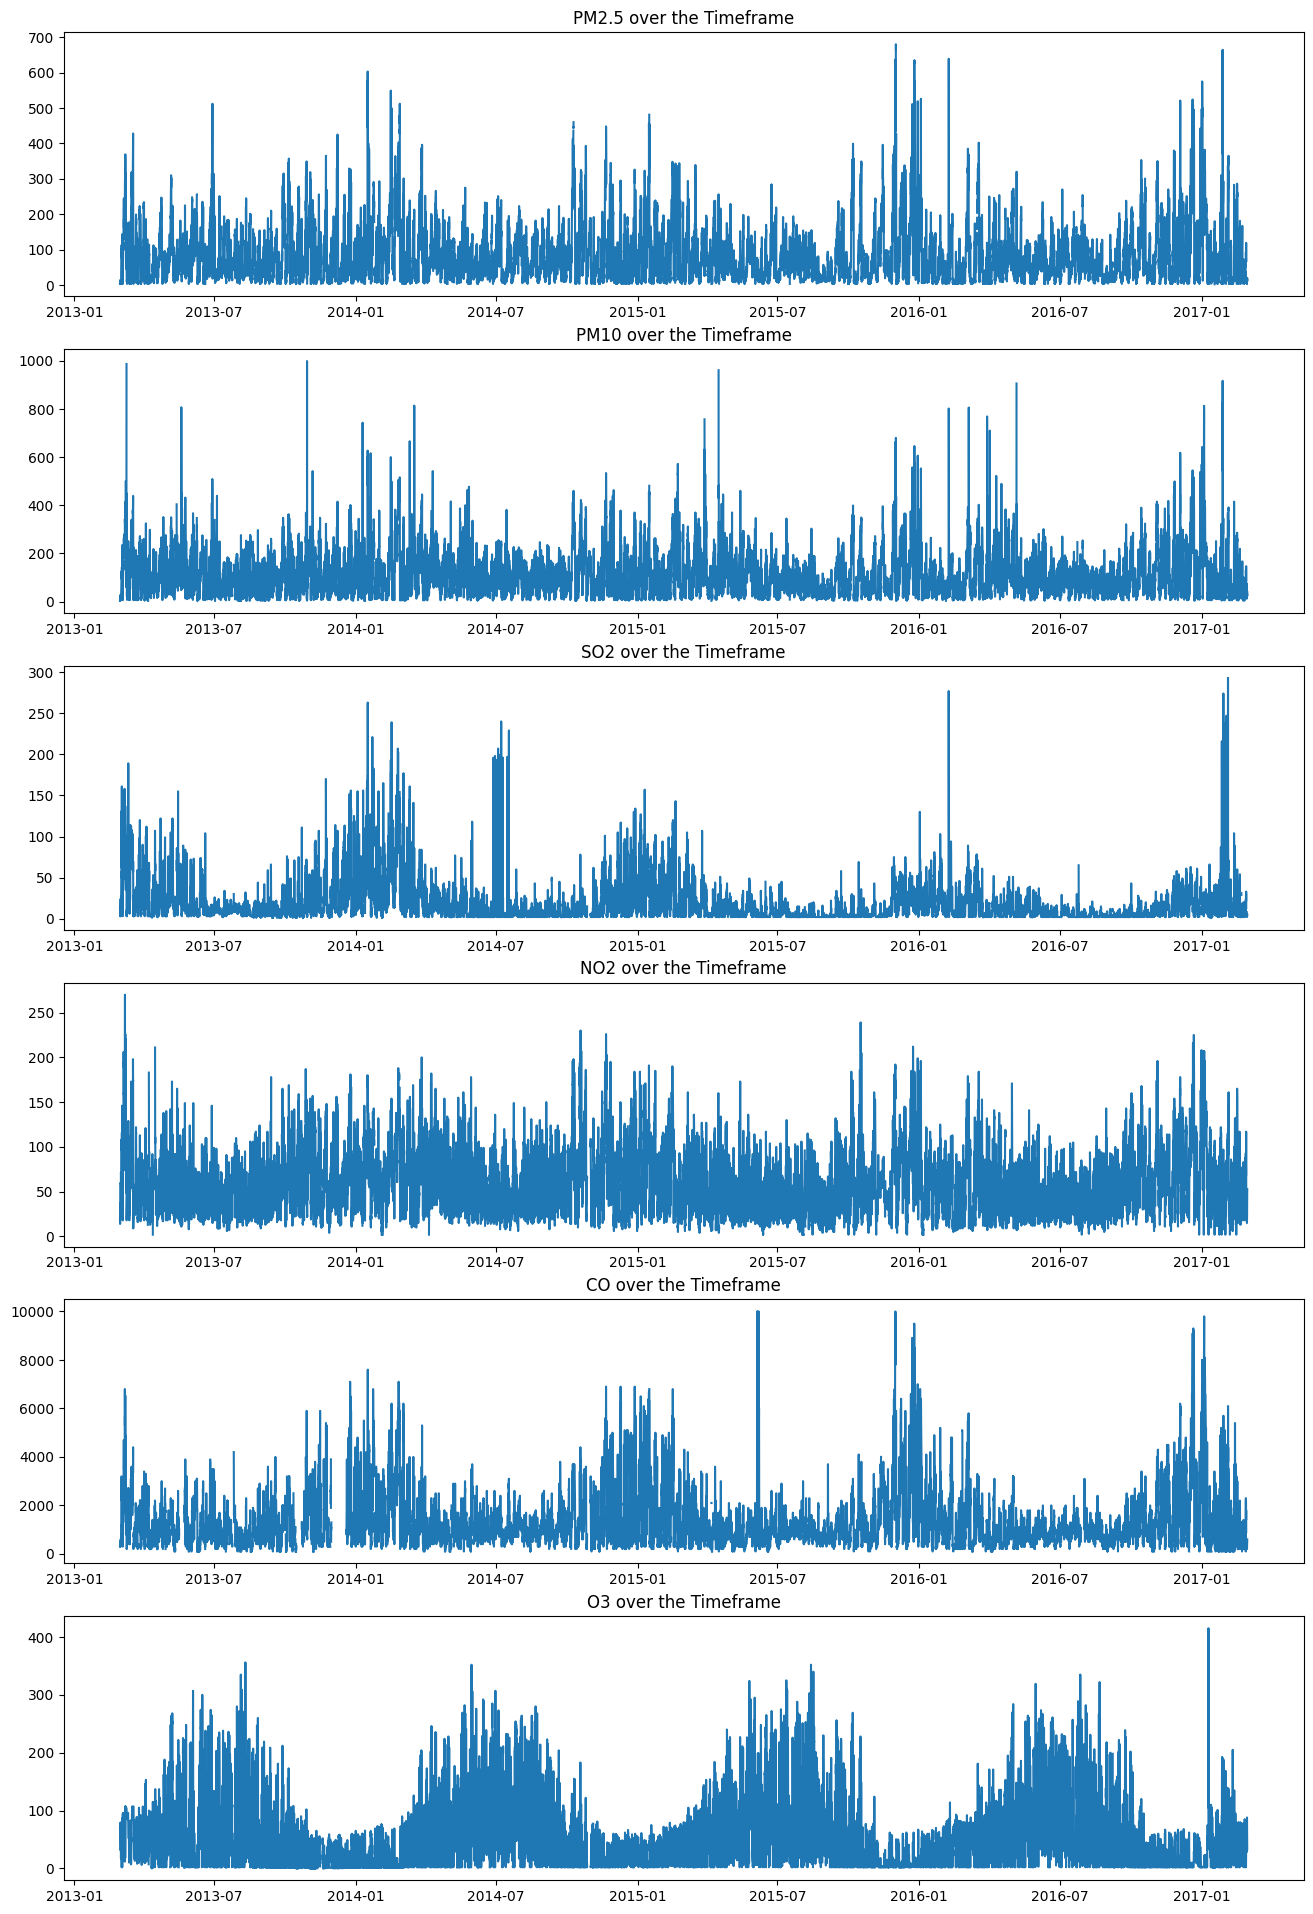

In [16]:
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['PM2.5']), linestyle='-')
ax[0].set_title("PM2.5 over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PM10']), linestyle='-')
ax[1].set_title("PM10 over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['SO2']), linestyle='-')
ax[2].set_title("SO2 over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['NO2']), linestyle='-')
ax[3].set_title("NO2 over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['CO']), linestyle='-')
ax[4].set_title("CO over the Timeframe")

ax[5].plot(df_0['timestamp'], np.array(df_0['O3']), linestyle='-')
ax[5].set_title("O3 over the Timeframe")

plt.show()

In [17]:
df_0[df_0[['TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM']].isna().any(axis=1)]

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,timestamp
6388,125.0,151.0,34.0,87.0,3400.0,NaN,-3.200,1020.5,-4.0,0.0,NaN,0.1,2013-11-22 04:00:00
11718,45.0,45.0,2.0,15.0,800.0,101.0,21.500,998.2,21.5,0.1,NaN,0.2,2014-07-02 06:00:00
13412,52.0,86.0,13.0,53.0,700.0,132.0,21.700,1008.0,15.8,0.0,NaN,0.0,2014-09-10 20:00:00
16748,30.0,48.0,17.0,81.0,1100.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-01-27 20:00:00
17263,10.0,10.0,7.0,24.0,500.0,50.0,NaN,NaN,NaN,NaN,NaN,NaN,2015-02-18 07:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
34314,244.0,301.0,61.0,83.0,2300.0,6.0,0.625,1016.0,-7.9,0.0,NaN,0.5,2017-01-28 18:00:00
34334,13.0,48.0,5.0,15.0,100.0,93.0,-1.220,1025.0,-21.6,0.0,NaN,6.5,2017-01-29 14:00:00
34560,108.0,120.0,20.0,83.0,200.0,2.0,-2.800,1026.3,-7.0,0.0,NaN,0.2,2017-02-08 00:00:00
34638,16.0,38.0,8.0,75.0,100.0,5.0,-4.600,1025.0,-18.1,0.0,NaN,0.2,2017-02-11 06:00:00


In [18]:
# Function to replace NaN values with the average of the non-NaN values above and below
def replace_nan_with_average(series):
    for i in range(1, len(series) - 1):
        if pd.isna(series[i]):
            start_index = i - 1
            end_index = i + 1
            while end_index < len(series) and pd.isna(series[end_index]):
                end_index += 1
            if end_index == len(series):
                end_index -= 1
        series.interpolate(method='linear', inplace=True)
    return series

# Apply the function to the 'value' column
df_0['CO'] = replace_nan_with_average(df_0['CO'])

In [19]:
df_0.dropna(inplace=True)
df_0.reset_index(drop=True, inplace=True)
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,timestamp
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33160,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,2017-02-28 19:00:00
33161,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,2017-02-28 20:00:00
33162,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,2017-02-28 21:00:00
33163,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,2017-02-28 22:00:00


Text(0.5, 1.0, 'O3 over the Timeframe')

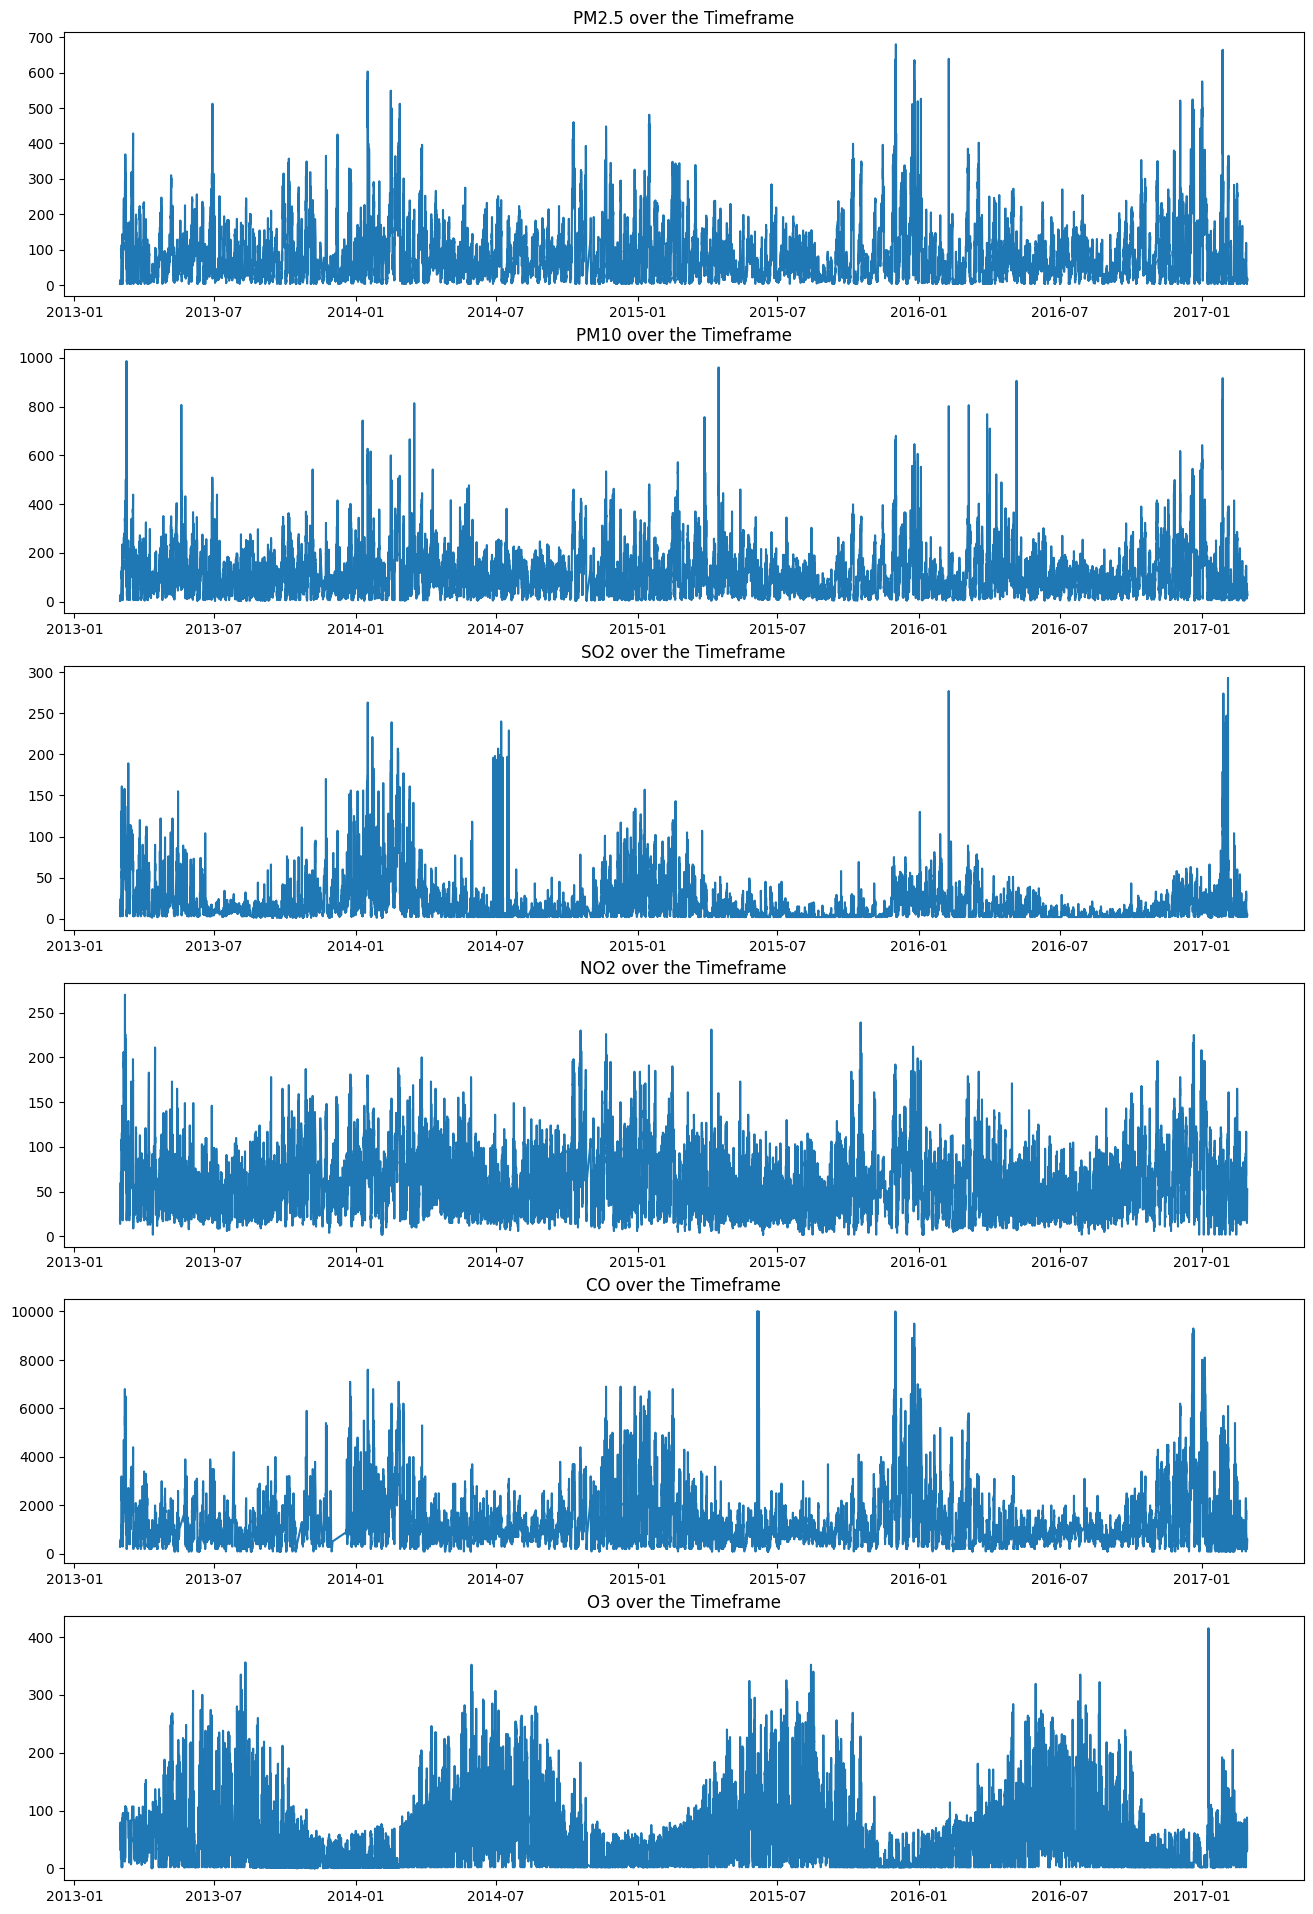

In [20]:
fig, ax = plt.subplots(ncols=1, nrows=6, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['PM2.5']), linestyle='-')
ax[0].set_title("PM2.5 over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PM10']), linestyle='-')
ax[1].set_title("PM10 over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['SO2']), linestyle='-')
ax[2].set_title("SO2 over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['NO2']), linestyle='-')
ax[3].set_title("NO2 over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['CO']), linestyle='-')
ax[4].set_title("CO over the Timeframe")

ax[5].plot(df_0['timestamp'], np.array(df_0['O3']), linestyle='-')
ax[5].set_title("O3 over the Timeframe")

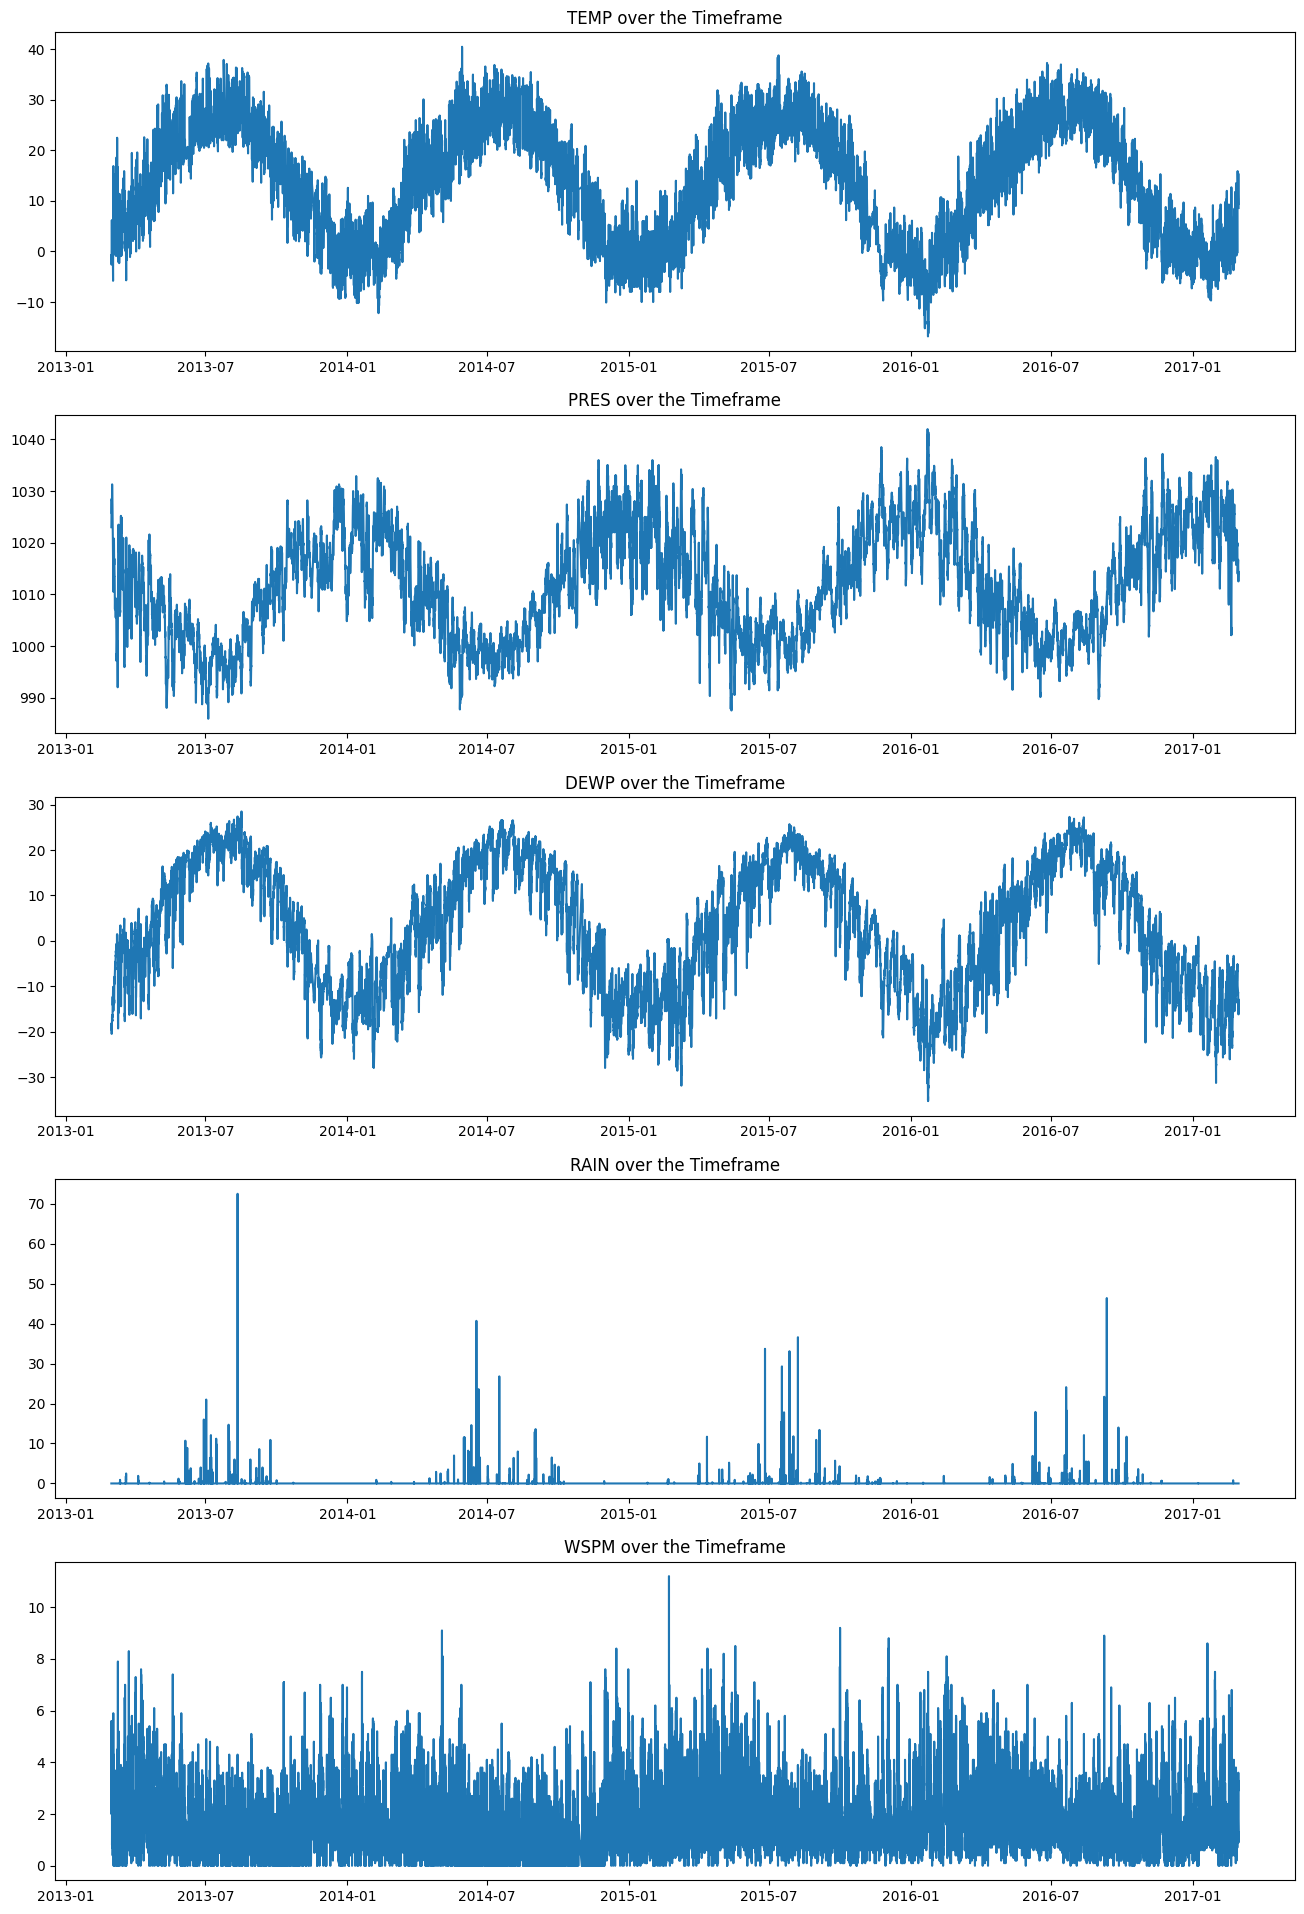

In [21]:
fig, ax = plt.subplots(ncols=1, nrows=5, figsize=(16,24))

ax[0].plot(df_0['timestamp'], np.array(df_0['TEMP']), linestyle='-')
ax[0].set_title("TEMP over the Timeframe")

ax[1].plot(df_0['timestamp'], np.array(df_0['PRES']), linestyle='-')
ax[1].set_title("PRES over the Timeframe")

ax[2].plot(df_0['timestamp'], np.array(df_0['DEWP']), linestyle='-')
ax[2].set_title("DEWP over the Timeframe")

ax[3].plot(df_0['timestamp'], np.array(df_0['RAIN']), linestyle='-')
ax[3].set_title("RAIN over the Timeframe")

ax[4].plot(df_0['timestamp'], np.array(df_0['WSPM']), linestyle='-')
ax[4].set_title("WSPM over the Timeframe");

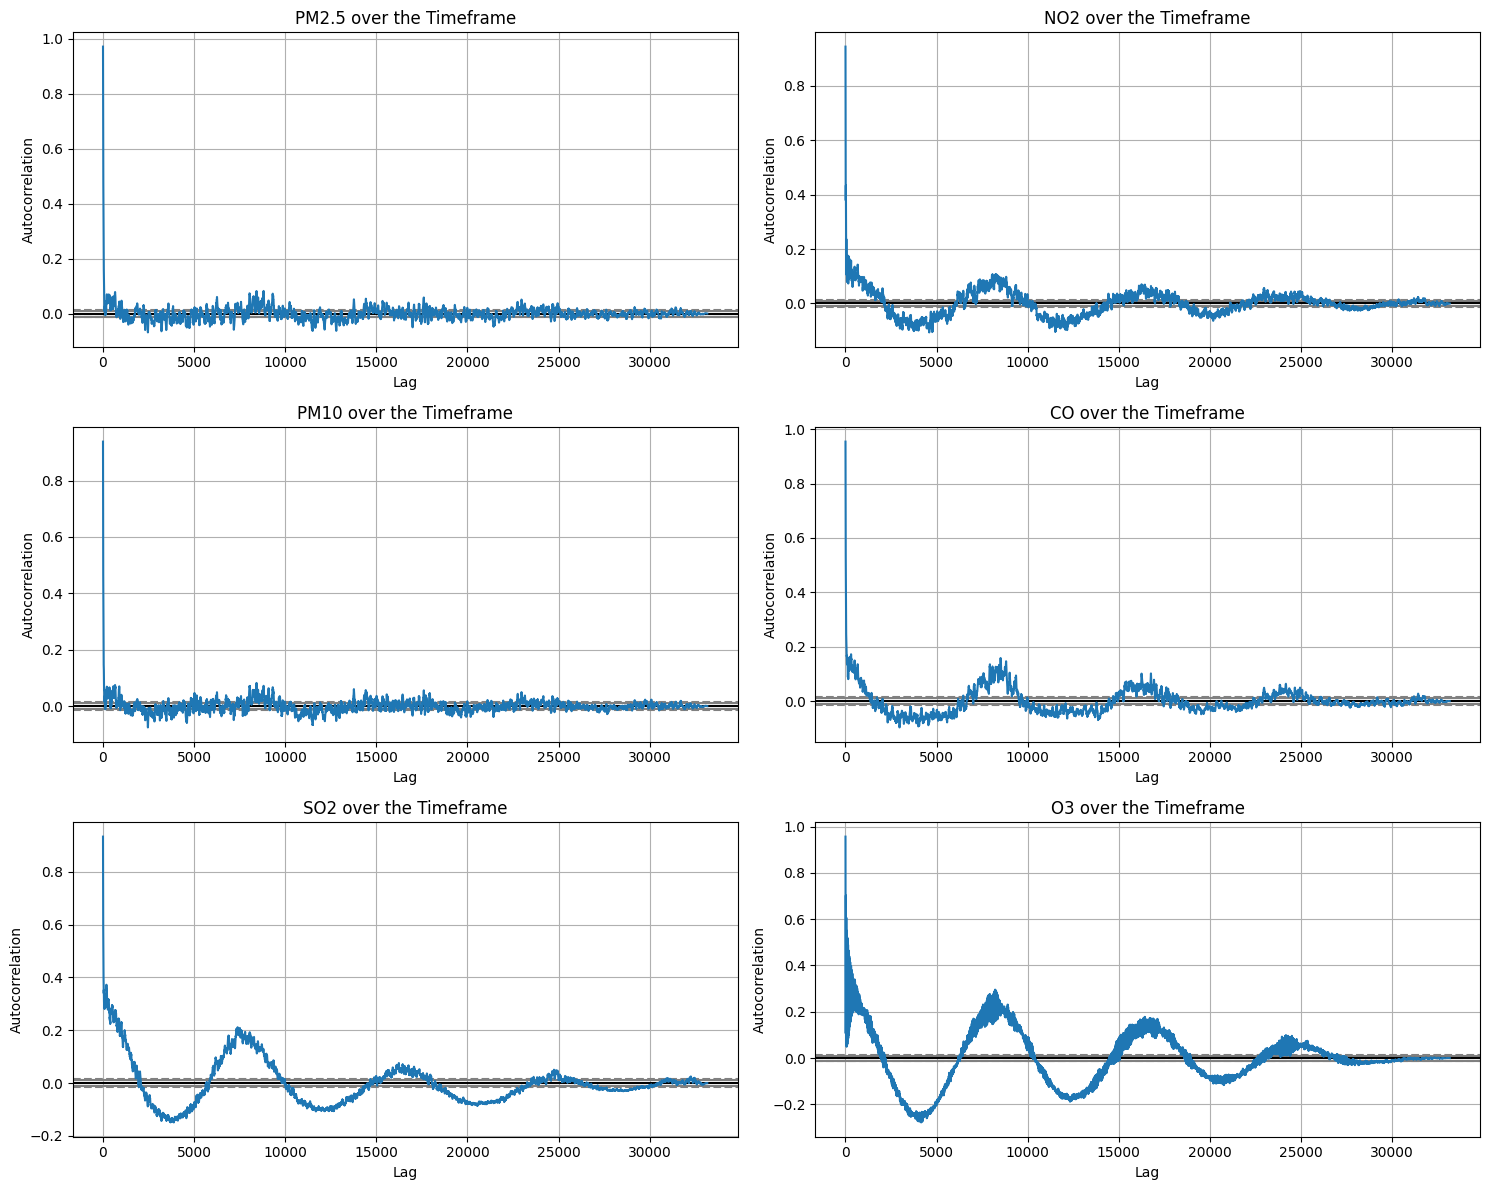

In [22]:
from pandas.plotting import autocorrelation_plot

fig, ax = plt.subplots(ncols=2, nrows=3, figsize=(15,12))

autocorrelation_plot(df_0['PM2.5'], ax=ax[0,0])
ax[0,0].set_title("PM2.5 over the Timeframe")

autocorrelation_plot(df_0['PM10'], ax=ax[1,0])
ax[1,0].set_title("PM10 over the Timeframe")

autocorrelation_plot(df_0['SO2'], ax=ax[2,0])
ax[2,0].set_title("SO2 over the Timeframe")

autocorrelation_plot(df_0['NO2'], ax=ax[0,1])
ax[0,1].set_title("NO2 over the Timeframe")

autocorrelation_plot(df_0['CO'], ax=ax[1,1])
ax[1,1].set_title("CO over the Timeframe")

autocorrelation_plot(df_0['O3'], ax=ax[2,1])
ax[2,1].set_title("O3 over the Timeframe")

plt.tight_layout();

In [23]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,timestamp
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,2013-03-01 00:00:00
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7,2013-03-01 01:00:00
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,2013-03-01 02:00:00
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1,2013-03-01 03:00:00
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0,2013-03-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33160,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4,2017-02-28 19:00:00
33161,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9,2017-02-28 20:00:00
33162,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1,2017-02-28 21:00:00
33163,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,NNW,1.2,2017-02-28 22:00:00


## Checking for Stationarity

In [24]:
ad_fuller_result_1 = adfuller(df_0['PM2.5'])

print('PM2.5')
print(f'ADF Stat: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

ad_fuller_result_2 = adfuller(df_0['PM10'])

print('PM10')
print(f'ADF Stat: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

ad_fuller_result_3 = adfuller(df_0['SO2'])

print('SO2')
print(f'ADF Stat: {ad_fuller_result_3[0]}')
print(f'p-value: {ad_fuller_result_3[1]}')

ad_fuller_result_4 = adfuller(df_0['NO2'])

print('NO2')
print(f'ADF Stat: {ad_fuller_result_4[0]}')
print(f'p-value: {ad_fuller_result_4[1]}')

ad_fuller_result_5 = adfuller(df_0['CO'])

print('CO')
print(f'ADF Stat: {ad_fuller_result_5[0]}')
print(f'p-value: {ad_fuller_result_5[1]}')

ad_fuller_result_6 = adfuller(df_0['O3'])

print('O3')
print(f'ADF Stat: {ad_fuller_result_6[0]}')
print(f'p-value: {ad_fuller_result_6[1]}')

PM2.5
ADF Stat: -18.47073028009593
p-value: 2.1400833709789054e-30
PM10
ADF Stat: -18.76464311350432
p-value: 2.0259090212600544e-30
SO2
ADF Stat: -13.861620695424959
p-value: 6.712920688789085e-26
NO2
ADF Stat: -17.16064699144014
p-value: 6.845474889749717e-30
CO
ADF Stat: -16.390148527426756
p-value: 2.699053905713933e-29
O3
ADF Stat: -11.1507309396711
p-value: 2.9482489095374846e-20


## Checking Dependancy

In [25]:
print('Does 2nd causes 1st column ?')
# granger_1 = grangercausalitytests(df_0[['PM2.5', 'TEMP']], 3)

# granger_2 = grangercausalitytests(df_0[['PM10', 'TEMP']], 3)

# granger_3 = grangercausalitytests(df_0[['SO2', 'TEMP']], 3)

# granger_4 = grangercausalitytests(df_0[['NO2', 'TEMP']], 3)

# granger_5 = grangercausalitytests(df_0[['CO', 'TEMP']], 3)

# granger_6 = grangercausalitytests(df_0[['O3', 'TEMP']], 3)

# granger_1 = grangercausalitytests(df_0[['PM2.5', 'PRES']], 3)

# granger_2 = grangercausalitytests(df_0[['PM10', 'PRES']], 3)

# granger_1 = grangercausalitytests(df_0[['PM2.5', 'DEWP']], 3)

# granger_2 = grangercausalitytests(df_0[['PM10', 'DEWP']], 3)

Does 2nd causes 1st column ?


# VAR (VEctor Auto Regression)

In [26]:
data = df_0[["PM2.5","PM10","SO2","NO2","CO","O3","TEMP","PRES","DEWP","RAIN","WSPM"]]

In [27]:
data

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
0,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,4.4
1,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,4.7
2,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,5.6
3,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,3.1
4,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
33160,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,2.4
33161,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,0.9
33162,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,1.1
33163,11.0,24.0,5.0,47.0,500.0,41.0,10.5,1014.4,-12.9,0.0,1.2


In [28]:
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

In [29]:
print(train_data.shape, test_data.shape)

(23215, 11) (9950, 11)


In [30]:
model = VAR(train_data.diff()[1:])
sorted_order = model.select_order(maxlags=50)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        38.91       38.92   7.927e+16       38.91
1        37.73       37.78   2.434e+16       37.75
2        37.47       37.56   1.876e+16       37.50
3        37.33       37.46   1.623e+16       37.37
4        37.23       37.41   1.482e+16       37.29
5        37.15       37.36   1.362e+16       37.22
6        37.08       37.34   1.275e+16       37.17
7        37.03       37.33   1.207e+16       37.13
8        36.98       37.32   1.146e+16       37.09
9        36.93       37.31   1.093e+16       37.05
10       36.88       37.31   1.044e+16       37.02
11       36.84       37.31   9.985e+15       36.99
12       36.79      37.30*   9.495e+15       36.95
13       36.75       37.30   9.149e+15       36.93
14       36.71       37.30   8.767e+15       36.90
15       36.67       37.31   8.434e+15       36.88
16       36.63       37.31   8.

In [31]:
var_model = VARMAX(train_data[:1000], order=(2,0), enforce_stationarity=True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                                                            Statespace Model Results                                                           
Dep. Variable:     ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']   No. Observations:                 1000
Model:                                                                                          VAR(2)   Log Likelihood              -32334.443
                                                                                           + intercept   AIC                          65306.887
Date:                                                                                 Sun, 28 Apr 2024   BIC                          66872.461
Time:                                                                                         11:05:50   HQIC                         65901.914
Sample:                                                                                              0                                  

In [32]:
n_forecast = 5
predict = fitted_model.get_prediction(start=len(train_data), end=len(train_data) + n_forecast -1)

predictions= predict.predicted_mean

In [33]:
predictions

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
23215,90.21,119.313,39.762685,68.18199,1360.6215,60.031152,7.0768,1011.7842,-5.2536,0.0301,2.1373
23216,90.21,119.313,39.762685,68.18199,1360.6215,60.031152,7.0768,1011.7842,-5.2536,0.0301,2.1373
23217,90.21,119.313,39.762685,68.18199,1360.6215,60.031152,7.0768,1011.7842,-5.2536,0.0301,2.1373
23218,90.21,119.313,39.762685,68.18199,1360.6215,60.031152,7.0768,1011.7842,-5.2536,0.0301,2.1373
23219,90.21,119.313,39.762685,68.18199,1360.6215,60.031152,7.0768,1011.7842,-5.2536,0.0301,2.1373


In [34]:
features = ['']

In [35]:
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

In [36]:
# reg = xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50)
# reg.fit(train_data)

In [37]:
from prophet import Prophet
import matplotlib.pyplot as plt

# Load your data
data = df_0[['timestamp', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN']]
data = data.rename(columns={"timestamp": "ds", "O3": "y"})

# Split data into train and test sets (70:30 ratio)
train_size = int(len(data) * 0.7)
train_data = data[:train_size]
test_data = data[train_size:]

In [38]:
# Initialize and fit the Prophet model
model = Prophet()
model.fit(train_data)

# Make predictions
future = model.make_future_dataframe(periods=len(test_data))
forecast = model.predict(future)
print(train_data)
print("*******************************************************")
print(test_data)
print("*******************************************************")
print(future)
print("*******************************************************")
print(forecast)

11:05:58 - cmdstanpy - INFO - Chain [1] start processing
11:06:05 - cmdstanpy - INFO - Chain [1] done processing


                       ds     y  TEMP    PRES  DEWP  RAIN
0     2013-03-01 00:00:00  69.0  -0.7  1023.0 -18.8   0.0
1     2013-03-01 01:00:00  72.0  -1.1  1023.2 -18.2   0.0
2     2013-03-01 02:00:00  69.0  -1.1  1023.5 -18.2   0.0
3     2013-03-01 03:00:00  62.0  -1.4  1024.5 -19.4   0.0
4     2013-03-01 04:00:00  71.0  -2.0  1025.2 -19.5   0.0
...                   ...   ...   ...     ...   ...   ...
23210 2015-12-28 03:00:00   2.0  -7.3  1032.6 -11.7   0.0
23211 2015-12-28 04:00:00   2.0  -7.6  1032.1 -12.1   0.0
23212 2015-12-28 05:00:00   2.0  -8.5  1032.0 -12.5   0.0
23213 2015-12-28 06:00:00   2.0  -9.5  1032.0 -12.5   0.0
23214 2015-12-28 07:00:00   2.0  -9.6  1032.1 -11.5   0.0

[23215 rows x 6 columns]
*******************************************************
                       ds     y  TEMP    PRES  DEWP  RAIN
23215 2015-12-28 08:00:00   2.0  -8.7  1032.6 -11.2   0.0
23216 2015-12-28 09:00:00   2.0  -6.6  1033.0 -12.5   0.0
23217 2015-12-28 10:00:00   2.0  -4.5  1033.3 -1

In [39]:
forecast = forecast[:(len(train_data) + len(test_data))]

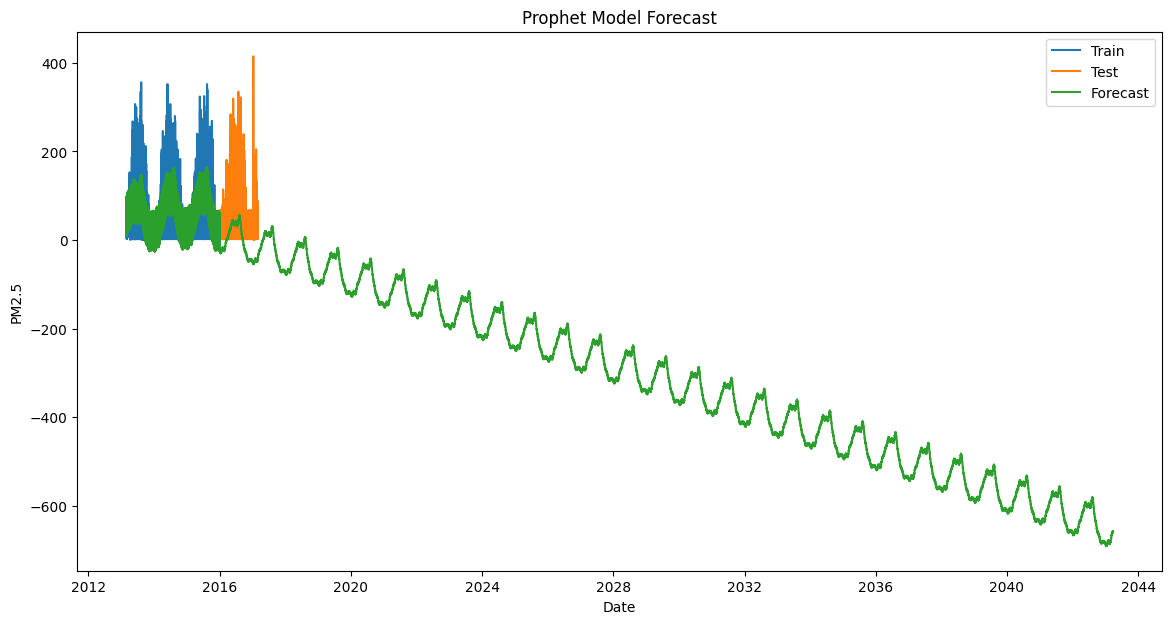

RMSE: 422.5440059776663
MAE: 374.6337905163577


In [40]:
# Plot train, test, and forecasted values
plt.figure(figsize=(14, 7))
plt.plot(train_data.sort_values(by=['ds'])['ds'], train_data.sort_values(by=['ds'])['y'], label='Train')
plt.plot(test_data.sort_values(by=['ds'])['ds'], test_data.sort_values(by=['ds'])['y'], label='Test')
plt.plot(forecast.sort_values(by=['ds'])['ds'], forecast.sort_values(by=['ds'])['yhat'], label='Forecast')
plt.legend()
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.title('Prophet Model Forecast')
plt.show()

# Calculate accuracy (you may need to define your own metric based on your specific requirements)
# For example, you could calculate RMSE or MAE
from sklearn.metrics import mean_squared_error, mean_absolute_error
rmse = mean_squared_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values, squared=False)
mae = mean_absolute_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values)
print("RMSE:", rmse)
print("MAE:", mae)

In [41]:
print(future)

                       ds
0     2013-03-01 00:00:00
1     2013-03-01 01:00:00
2     2013-03-01 02:00:00
3     2013-03-01 03:00:00
4     2013-03-01 04:00:00
...                   ...
33160 2043-03-22 07:00:00
33161 2043-03-23 07:00:00
33162 2043-03-24 07:00:00
33163 2043-03-25 07:00:00
33164 2043-03-26 07:00:00

[33165 rows x 1 columns]


In [42]:
# model = Prophet()
# model.add_regressor('TEMP', standardize=False)
# model.add_regressor('PRES', standardize=False)
# model.add_regressor('DEWP', standardize=False)
# model.add_regressor('RAIN', standardize=False)
# model.fit(train_data)

# # Make predictions
# future = model.make_future_dataframe(periods=len(test_data))

# forecast = model.predict(future)
# print(train_data)
# print("*******************************************************")
# print(test_data)
# print("*******************************************************")
# print(future)
# print("*******************************************************")
# print(forecast)

In [43]:
# forecast = forecast[:(len(train_data) + len(test_data))]

In [44]:
# # Plot train, test, and forecasted values
# plt.figure(figsize=(14, 7))
# plt.plot(train_data.sort_values(by=['ds'])['ds'], train_data.sort_values(by=['ds'])['y'], label='Train')
# plt.plot(test_data.sort_values(by=['ds'])['ds'], test_data.sort_values(by=['ds'])['y'], label='Test')
# plt.plot(forecast.sort_values(by=['ds'])['ds'], forecast.sort_values(by=['ds'])['yhat'], label='Forecast')
# plt.legend()
# plt.xlabel('Date')
# plt.ylabel('PM2.5')
# plt.title('Prophet Model Forecast')
# plt.show()

# # Calculate accuracy (you may need to define your own metric based on your specific requirements)
# # For example, you could calculate RMSE or MAE
# from sklearn.metrics import mean_squared_error, mean_absolute_error
# rmse = mean_squared_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values, squared=False)
# mae = mean_absolute_error(test_data['y'], forecast.loc[train_size:, 'yhat'].values)
# print("RMSE:", rmse)
# print("MAE:", mae)

In [45]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler

2024-04-28 11:06:16.569035: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-28 11:06:16.569174: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-28 11:06:16.712451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [46]:
# scaler = StandardScaler()
# scaler = scaler.fit(train_data)
# train_data = scaler.transform(train_data)

In [47]:
# model = Sequential()
# model.add(LSTM(64, activation='relu', input_shape=(train_data.shape[1], train_data.shape[2], return_sequences=True)))
# model.add((LSTM(32, activation='relu', return_sequences=False)))
# model.add(Dropout(0.2))
# model.add(Dense(train_data_y.shape[1]))

# model.compile(optimizer='adam', loss='mse')
# model.summary()

In [48]:
df_0.set_index('timestamp', inplace=True)
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
timestamp,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1


<Axes: xlabel='timestamp'>

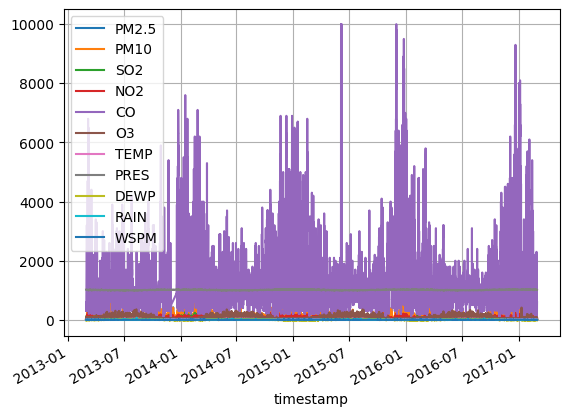

In [49]:
%matplotlib inline
df_0.plot(grid='on')

In [50]:
df = df_0['SO2']

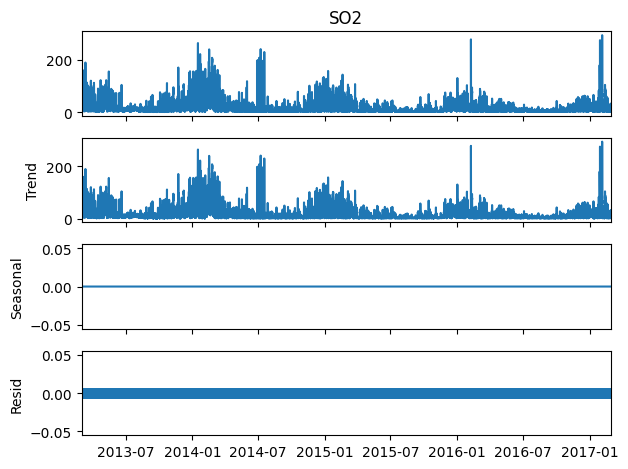

In [51]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=1, model='additive')
fig = decomposition.plot()

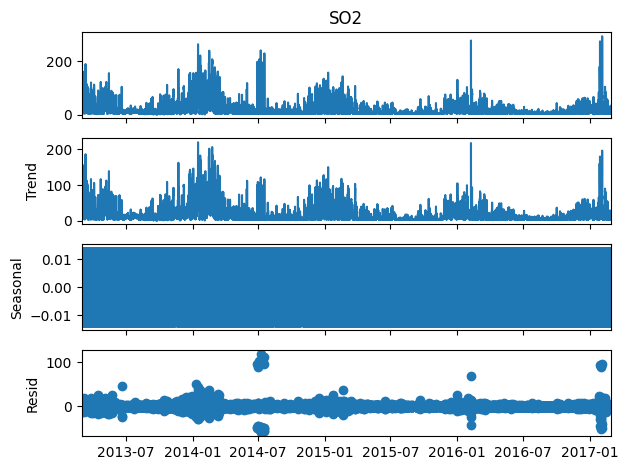

In [52]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=2, model='additive')
fig = decomposition.plot()

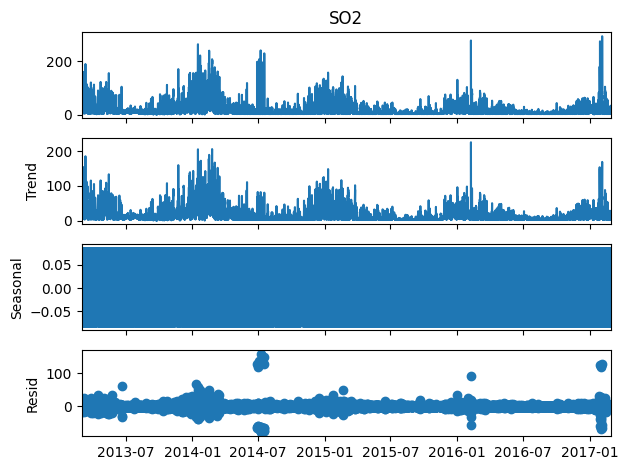

In [53]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=3, model='additive')
fig = decomposition.plot()

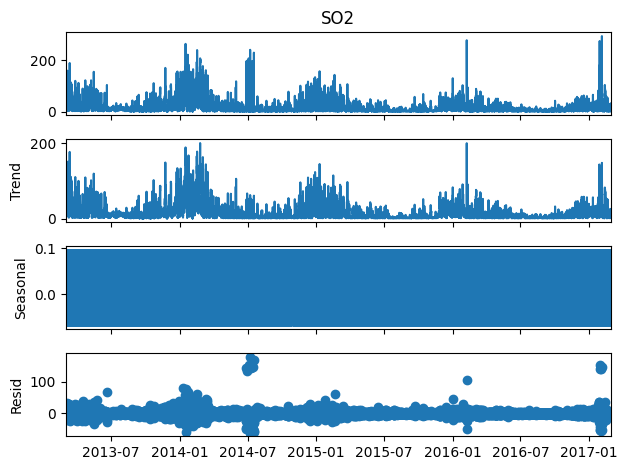

In [54]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=4, model='additive')
fig = decomposition.plot()

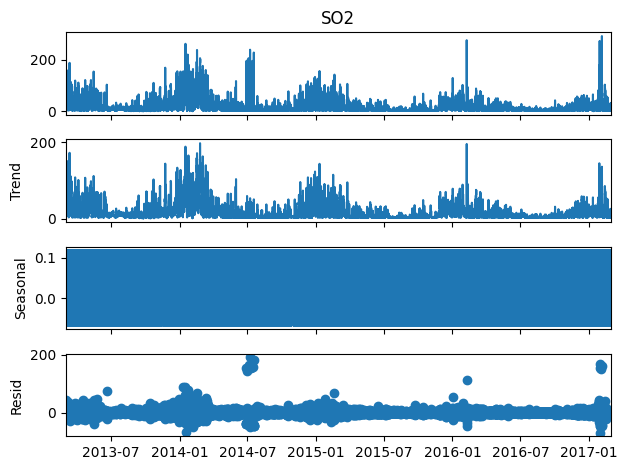

In [55]:
import statsmodels.api as sm

decomposition = sm.tsa.seasonal_decompose(df,period=5, model='additive')
fig = decomposition.plot()

In [56]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
timestamp,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [57]:
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import pandas as pd
df_0.columns

Index(['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM'],
      dtype='object')

In [58]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
timestamp,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [59]:
# model = ARIMA(df_0['index'], order=(5,1,0))
# model_fit = model.fit()

In [60]:
# # summary of fit model
# print(model_fit.summary())

In [61]:
# # line plot of residuals
# residuals = pd.DataFrame(model_fit.resid)
# residuals.plot()

In [62]:
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

In [63]:
# # evaluate an ARIMA model using a walk-forward validation
# from matplotlib import pyplot
# from statsmodels.tsa.arima.model import ARIMA
# from sklearn.metrics import mean_squared_error
# from math import sqrt

# # split into train and test sets
# X = df_0['index']
# size = int(len(X) * 0.66)
# train, test = X[0:size], X[size:len(X)]
# history = [x for x in train]
# predictions = list()
# # walk-forward validation
# for t in range(len(test)):
#     model = ARIMA(history, order=(5,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     predictions.append(yhat)
#     obs = test[t]
#     history.append(obs)
    
# # evaluate forecasts
# rmse = sqrt(mean_squared_error(test, predictions))
# print('Test RMSE: %.3f' % rmse)
# # plot forecasts against actual outcomes
# pyplot.plot(test)
# pyplot.plot(predictions, color='red')
# pyplot.show()

In [64]:
from statsmodels.tsa.stattools import adfuller, acf

In [65]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [66]:
# specify training data
data = df_0['PM2.5']
# specify additional data
other_data = df_0['TEMP']
# define model
model = SARIMAX(data, exog=other_data)

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [67]:
# # fit model
# model_fit = model.fit()

In [68]:
# # specify training data
# data = ...
# # define model
# model = SARIMAX(data, order=..., seasonal_order=...)
# # fit model
# model_fit = model.fit()
# # one step forecast
# yhat = model_fit.forecast()

In [69]:
# # specify training data
# data = ...
# # define model
# model = SARIMAX(data, order=..., seasonal_order=...)
# # fit model
# model_fit = model.fit()
# # one step forecast
# yhat = model_fit.predict(start=len(data), end=len(data))

In [70]:
# # fit an ARIMA model and plot residual errors
# from statsmodels.tsa.arima.model import ARIMA
# from matplotlib import pyplot
# # load dataset
# series = pd.read_csv('shampoo-sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
# series.index = series.index.to_period('M')
# # fit model
# model = ARIMA(series, order=(5,1,0))
# model_fit = model.fit()
# # summary of fit model
# print(model_fit.summary())
# # line plot of residuals
# residuals = DataFrame(model_fit.resid)
# residuals.plot()
# pyplot.show()
# # density plot of residuals
# residuals.plot(kind='kde')
# pyplot.show()
# # summary stats of residuals
# print(residuals.describe())

In [71]:
# #import libraries and packages:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import SimpleRNN
# from keras.layers import Dropout

# #Initialize RNN:
# regressor = Sequential()

# #Adding the first RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True, input_shape= (df_0['PM2.5'].shape[1],1)))
# regressor.add(Dropout(0.2))

# #Adding the second RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the third RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50, activation='tanh', return_sequences=True))
# regressor.add(Dropout(0.2))

# #Adding the fourth RNN layer and some Dropout regularization
# regressor.add(SimpleRNN(units = 50))
# regressor.add(Dropout(0.2))

# #Adding the output layer
# regressor.add(Dense(units = 1))

# #Compile the RNN
# regressor.compile(optimizer='adam', loss='mean_squared_error')

# #Fitting the RNN to the Training set
# regressor.fit(X_train, y_train, epochs=100, batch_size=32)

In [72]:
import tensorflow as tf
import keras
from keras import layers

In [73]:
model = keras.Sequential()
# Add an Embedding layer expecting input vocab of size 1000, and
# output embedding dimension of size 64.
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# Add a LSTM layer with 128 internal units.
model.add(layers.LSTM(128))

# Add a Dense layer with 10 units.
model.add(layers.Dense(10))

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [74]:
model = keras.Sequential()
model.add(layers.Embedding(input_dim=1000, output_dim=64))

# The output of GRU will be a 3D tensor of shape (batch_size, timesteps, 256)
model.add(layers.GRU(256, return_sequences=True))

# The output of SimpleRNN will be a 2D tensor of shape (batch_size, 128)
model.add(layers.SimpleRNN(128))

model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [75]:
encoder_vocab = 1000
decoder_vocab = 2000

encoder_input = layers.Input(shape=(None,))
encoder_embedded = layers.Embedding(input_dim=encoder_vocab, output_dim=64)(
    encoder_input
)

# Return states in addition to output
output, state_h, state_c = layers.LSTM(64, return_state=True, name="encoder")(
    encoder_embedded
)
encoder_state = [state_h, state_c]

decoder_input = layers.Input(shape=(None,))
decoder_embedded = layers.Embedding(input_dim=decoder_vocab, output_dim=64)(
    decoder_input
)

# Pass the 2 states to a new LSTM layer, as initial state
decoder_output = layers.LSTM(64, name="decoder")(
    decoder_embedded, initial_state=encoder_state
)
output = layers.Dense(10)(decoder_output)

model = keras.Model([encoder_input, decoder_input], output)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_1       │ (None, None)      │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, None, 64)  │     64,000 │ input_layer[0][0] │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_3         │ (None, None, 64)  │    128,000 │ input_layer_1[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ encoder (LSTM)      │ [(None, 64),      │     33,024 │ embedding_2[0][0] │
│                     │ (None, 64),       │            │                   │
│                     │ (None, 64)]       │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ decoder (LSTM)      │ (None, 64)        │     33,024 │ embedding_3[0][0… │
│                     │                   │            │ encoder[0][1],    │
│                     │                   │            │ encoder[0][2]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 10)        │        650 │ decoder[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 258,698 (1010.54 KB)

 Trainable params: 258,698 (1010.54 KB)

 Non-trainable params: 0 (0.00 B)

In [76]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)
output = lstm_layer(paragraph3)

# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default.
lstm_layer.reset_states()

In [77]:
paragraph1 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph2 = np.random.random((20, 10, 50)).astype(np.float32)
paragraph3 = np.random.random((20, 10, 50)).astype(np.float32)

lstm_layer = layers.LSTM(64, stateful=True)
output = lstm_layer(paragraph1)
output = lstm_layer(paragraph2)

existing_state = lstm_layer.states

new_lstm_layer = layers.LSTM(64)
new_output = new_lstm_layer(paragraph3, initial_state=existing_state)

In [78]:
model = keras.Sequential()

model.add(
    layers.Bidirectional(layers.LSTM(64, return_sequences=True), input_shape=(5, 10))
)
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(10))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)   │ (None, 5, 128)         │        38,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 64)             │        41,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 80,266 (313.54 KB)

 Trainable params: 80,266 (313.54 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
batch_size = 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height is treated like time).
input_dim = 28

units = 64
output_size = 10  # labels are from 0 to 9


# Build the RNN model
def build_model(allow_cudnn_kernel=True):
    # CuDNN is only available at the layer level, and not at the cell level.
    # This means `LSTM(units)` will use the CuDNN kernel,
    # while RNN(LSTMCell(units)) will run on non-CuDNN kernel.
    if allow_cudnn_kernel:
        # The LSTM layer with default options uses CuDNN.
        lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
    else:
        # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
        lstm_layer = keras.layers.RNN(
            keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [80]:
mnist = keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
sample, sample_label = x_train[0], y_train[0]

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [81]:
model = build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)


model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.5673 - loss: 1.3227 - val_accuracy: 0.8146 - val_loss: 0.5771


In [82]:
noncudnn_model = build_model(allow_cudnn_kernel=False)
noncudnn_model.set_weights(model.get_weights())
noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)
noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8575 - loss: 0.4639 - val_accuracy: 0.8824 - val_loss: 0.3583


Predicted result is: [3], target result is: 5


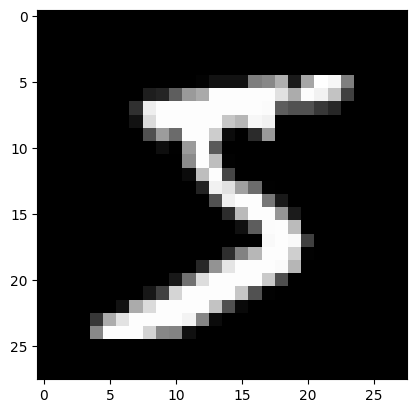

In [83]:
import matplotlib.pyplot as plt

with tf.device("CPU:0"):
    cpu_model = build_model(allow_cudnn_kernel=True)
    cpu_model.set_weights(model.get_weights())
    result = tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
    print(
        "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
    )
    plt.imshow(sample, cmap=plt.get_cmap("gray"))

In [84]:
@keras.saving.register_keras_serializable()
class NestedCell(keras.layers.Layer):
    def __init__(self, unit_1, unit_2, unit_3, **kwargs):
        self.unit_1 = unit_1
        self.unit_2 = unit_2
        self.unit_3 = unit_3
        self.state_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        self.output_size = [tf.TensorShape([unit_1]), tf.TensorShape([unit_2, unit_3])]
        super().__init__(**kwargs)

    def build(self, input_shapes):
        # expect input_shape to contain 2 items, [(batch, i1), (batch, i2, i3)]
        i1 = input_shapes[0][1]
        i2 = input_shapes[1][1]
        i3 = input_shapes[1][2]

        self.kernel_1 = self.add_weight(
            shape=(i1, self.unit_1), initializer="uniform", name="kernel_1"
        )
        self.kernel_2_3 = self.add_weight(
            shape=(i2, i3, self.unit_2, self.unit_3),
            initializer="uniform",
            name="kernel_2_3",
        )

    def call(self, inputs, states):
        # inputs should be in [(batch, input_1), (batch, input_2, input_3)]
        # state should be in shape [(batch, unit_1), (batch, unit_2, unit_3)]
        input_1, input_2 = tf.nest.flatten(inputs)
        s1, s2 = states

        output_1 = tf.matmul(input_1, self.kernel_1)
        output_2_3 = tf.einsum("bij,ijkl->bkl", input_2, self.kernel_2_3)
        state_1 = s1 + output_1
        state_2_3 = s2 + output_2_3

        output = (output_1, output_2_3)
        new_states = (state_1, state_2_3)

        return output, new_states

    def get_config(self):
        return {"unit_1": self.unit_1, "unit_2": self.unit_2, "unit_3": self.unit_3}

In [85]:
# unit_1 = 10
# unit_2 = 20
# unit_3 = 30

# i1 = 32
# i2 = 64
# i3 = 32
# batch_size = 64
# num_batches = 10
# timestep = 50

# cell = NestedCell(unit_1, unit_2, unit_3)
# rnn = keras.layers.RNN(cell)

# input_1 = keras.Input((None, i1))
# input_2 = keras.Input((None, i2, i3))

# outputs = rnn((input_1, input_2))

# model = keras.models.Model([input_1, input_2], outputs)

# model.compile(optimizer="adam", loss="mse", metrics=["accuracy"])

In [86]:
# input_1_data = np.random.random((batch_size * num_batches, timestep, i1))
# input_2_data = np.random.random((batch_size * num_batches, timestep, i2, i3))
# target_1_data = np.random.random((batch_size * num_batches, unit_1))
# target_2_data = np.random.random((batch_size * num_batches, unit_2, unit_3))
# input_data = [input_1_data, input_2_data]
# target_data = [target_1_data, target_2_data]

# model.fit(input_data, target_data, batch_size=batch_size)

## K

In [87]:
df_0

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM
timestamp,,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,14.0,20.0,300.0,69.0,-0.7,1023.0,-18.8,0.0,NNW,4.4
2013-03-01 01:00:00,4.0,4.0,13.0,17.0,300.0,72.0,-1.1,1023.2,-18.2,0.0,N,4.7
2013-03-01 02:00:00,3.0,3.0,10.0,19.0,300.0,69.0,-1.1,1023.5,-18.2,0.0,NNW,5.6
2013-03-01 03:00:00,3.0,6.0,7.0,24.0,400.0,62.0,-1.4,1024.5,-19.4,0.0,NW,3.1
2013-03-01 04:00:00,3.0,6.0,5.0,14.0,400.0,71.0,-2.0,1025.2,-19.5,0.0,N,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2017-02-28 19:00:00,13.0,37.0,3.0,36.0,400.0,60.0,12.5,1013.5,-16.2,0.0,NW,2.4
2017-02-28 20:00:00,20.0,43.0,4.0,48.0,500.0,43.0,11.6,1013.6,-15.1,0.0,WNW,0.9
2017-02-28 21:00:00,16.0,33.0,5.0,39.0,500.0,50.0,10.8,1014.2,-13.3,0.0,NW,1.1


In [88]:
data

timestamp
2013-03-01 00:00:00     4.0
2013-03-01 01:00:00     4.0
2013-03-01 02:00:00     3.0
2013-03-01 03:00:00     3.0
2013-03-01 04:00:00     3.0
                       ... 
2017-02-28 19:00:00    13.0
2017-02-28 20:00:00    20.0
2017-02-28 21:00:00    16.0
2017-02-28 22:00:00    11.0
2017-02-28 23:00:00    15.0
Name: PM2.5, Length: 33165, dtype: float64

In [89]:
data.columns=["Time Stamp","PM2.5"]
data.head()

timestamp
2013-03-01 00:00:00    4.0
2013-03-01 01:00:00    4.0
2013-03-01 02:00:00    3.0
2013-03-01 03:00:00    3.0
2013-03-01 04:00:00    3.0
Name: PM2.5, dtype: float64

In [90]:
data = data.to_frame()

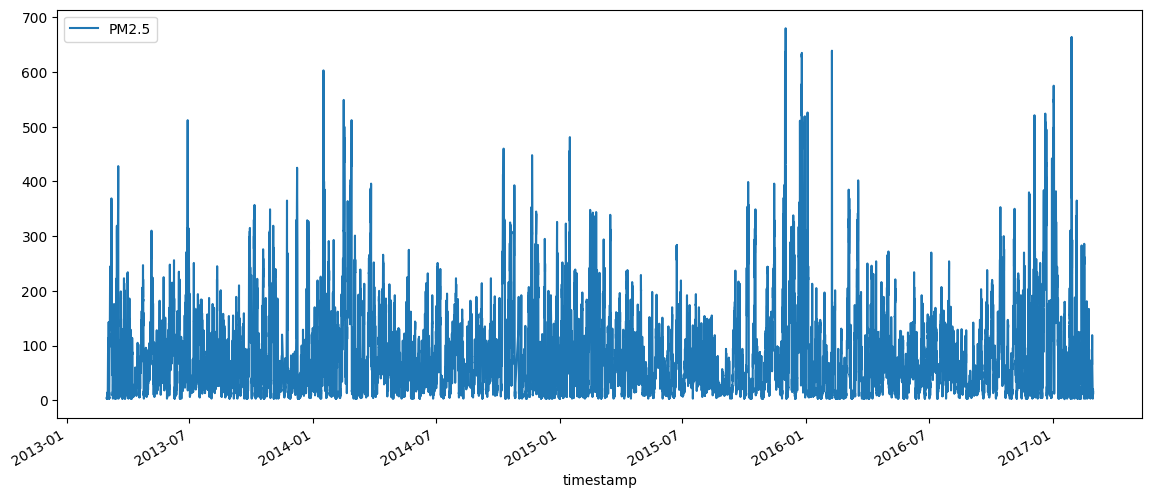

In [91]:
data.plot(figsize=(14, 6))
plt.show()

In [92]:
data.reset_index(inplace=True)

In [93]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33165 entries, 0 to 33164
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   timestamp  33165 non-null  datetime64[ns]
 1   PM2.5      33165 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 518.3 KB


In [94]:
### Testing For Stationarity
from statsmodels.tsa.stattools import adfuller

In [95]:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(sales):
    result=adfuller(sales)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [96]:
adfuller_test(data['PM2.5'])

ADF Test Statistic : -18.47073028009593
p-value : 2.1400833709789054e-30
#Lags Used : 41
Number of Observations Used : 33123
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


* As the p value is less than 0.05, the data is stationary